In [1]:
import sys,os
import geopandas as gpd

path_ufo_map = r'C:\Users\miln\tubCloud\Work-in-progress\building-project\git-ufo-map'
sys.path.append(path_ufo_map)
from ufo_map.Preprocessing.parsing import *

In [2]:
path_data = os.path.join(path_ufo_map,'testing','Data_Testing')

## SHP

In [3]:
gdf = gpd.read_file(os.path.join(path_data,'pra.shp'))

In [4]:
elem_shp = ['TYP','zakladova deska','svisla obvodova stena']
ID = 'ID_BUD'
footprints = gdf[gdf[elem_shp[0]] == elem_shp[1]].dissolve(by=ID,as_index=False)
walls = gdf[gdf[elem_shp[0]] == elem_shp[2]]
calc_height_shp(walls,ID)

# calc_height_shp: OK

ID_BUD
36750     4.856
37229    11.748
37248     5.911
37250     4.918
dtype: float64

In [5]:
elem_shp = ['TYP','zakladova deska','svisla obvodova stena']
walls_to_height_shp(gdf,'ID_BUD',elem_shp)

# walls_to_height_shp: OK

,ID_BUD,geometry,AKTUALIZAC,ML,ZMENA,KATUZE_KOD,SKUPINA,TYP,ID_FACE,Shape_Leng,Shape_Area,height
0,36750,"POLYGON Z ((-751676.941 -1039950.207 353.263, ...",201109,Bero00,None,729710,9,zakladova deska,6,24.376179,37.061627,4.856
1,37229,"POLYGON Z ((-751368.167 -1040000.964 352.540, ...",200908,Bero00,None,729795,9,zakladova deska,16,37.731311,88.615396,11.748
2,37248,"POLYGON Z ((-751728.341 -1040006.086 354.033, ...",201109,Bero00,None,729710,9,zakladova deska,26,16.475862,11.239934,5.911
3,37250,"POLYGON Z ((-751438.114 -1040000.131 352.919, ...",200908,Bero00,None,729795,9,zakladova deska,33,18.978562,22.232850,4.918


## GML

In [9]:
bldg_elem = 'bldg:Building'

In [10]:
file_paths = {'ch':os.path.join(path_data,'ch.gml'),
              'sa':os.path.join(path_data,'sachsen.gml'),
              'lu':os.path.join(path_data,'lux.gml'),
              'ha':os.path.join(path_data,'hamburg.xml'),
              'se':os.path.join(path_data,'sevilla_building.gml')}

In [17]:
files = ['ch','sa','lu','ha']

In [20]:
bldg_elem_list = {f:'' for f in files}
gml_root = {f:'' for f in files}

for f in files:
    gml = etree.parse(file_paths[f])
    gml_root[f] = gml.getroot()
    bldg_elem_list[f] = get_bldg_elements(gml,gml_root[f],bldg_elem) 
    print(f)

bldg_elem_se = 'bu-ext2d:Building'
gml = etree.parse(file_paths['se'])
gml_root['se'] = gml.getroot()
bldg_elem_list['se'] = get_bldg_elements(gml,gml_root['se'],bldg_elem_se)
print('se')
# get_bldg_elements: OK

ch
sa
lu
ha
se


In [35]:
elem = {f:'' for f in files+['se']}
for f in files+['se']: elem[f] = bldg_elem_list[f][0]

In [11]:
for f in ['ch','sa','ha']: 
    print(get_ids(bldg_elem_list[f],gml_root[f]))
    print(f)
    
# get_ids: OK

['_6F33B4C3-F009-428F-BCB3-F9A35CD0BF5C', '_3374B83F-65B8-42C6-B38E-4B697AB78FED', '_CAC0C79F-77BE-4314-BDAC-9FAA3D45BCFF', '_AAA5442C-7BA8-4C3D-BA03-C032D92D9746', '_7F1E8F61-89C0-4B72-BC51-213D1D3F4A62', '_ECD11BA8-FA2E-42B6-8FC4-DEA51AB0317D', '_D8A3FE06-1DE7-4054-8CB2-76840AA51500', '_A55E976C-9B7B-4186-A33B-E8061937FA0E', '_F4102C7D-00F2-4F66-9754-E81E656769A1', '_8BC8CE22-23BB-4DDB-8224-7D81533DF47F', '_4A9C2C87-8FF4-427E-AF4C-02900D9E5319', '_94238EF7-8163-4A6C-80FA-62FCA7122AC4', '_5311BDE8-AA76-4C00-8AFE-D815AE4636F9', '_3728C1DC-9D5C-49D4-B6C0-5F3A513D293F', '_6B015F11-F5D6-482F-A8F3-2DCCDE2973AC', '_CE43A0F9-A4D7-489B-8922-D57902745180', '_CC54283F-21B7-4F89-81C4-4403B2D9E5BD', '_373B14F5-B708-44DE-8D60-DA824BDEFDA8', '_61590BAE-F452-4CA7-B65F-654DA1085951', '_D88F48BA-5884-4EFE-9B10-CBA1085F41CB', '_D260116E-FB8D-4670-BA1E-E2F39563F661', '_DBE53C96-A9F7-4FD7-B63B-F05DCFFF5E4C', '_46DD39CC-968E-4631-A93D-3F632DA43F54', '_8515F063-8579-4E97-AA75-8950E50F4760', '_D25B18A4-EE59

In [12]:
height_elem = 'bldg:measuredHeight'
list_h = elem['sa'].findall(".//{}".format(height_elem),gml_root['sa'].nsmap)
print(list_elem_to_max(list_h))

# list_elem_to_max: OK

7.193


In [13]:
height_elem = 'bldg:measuredHeight'
get_var_attrib(height_elem,bldg_elem_list['sa'],gml_root['sa'])

# get_var_attrib: OK

[7.193,
 11.983,
 6.0,
 4.679,
 9.633,
 3.878,
 5.821,
 3.016,
 2.768,
 11.962,
 3.191,
 11.206,
 3.76,
 5.714,
 5.215,
 6.521,
 5.216]

In [13]:
str_elem = 'gen:intAttribute/[@name="HERKUNFT_JAHR"]/gen:value'
for f in ['ch']: 
    print(get_uni_attrib(str_elem,bldg_elem_list[f],gml_root[f]))

# get_uni_attrib: OK 

['2015', '2012', '2015', '2015', '2015', '2015', '2015', '2018', '2015', '2018', '2015', '2015', '2015', '2018', '2015', '2015', '2018', '2015', '2018', '2015', '2015', '2015', '2015', '2012', '2015', '2015', '2015', '2018', '2015', '2015', '2018', '2012', '2015', '2015', '2015', '2012', '2015', '2015', '2018', '2012', '2015', '2015', '2012', '2015', '2015', '2015', '2012', '2012', '2015', '2015', '2015', '2015', '2018', '2015', '2015', '2015', '2015']


In [ ]:
str_elem = 'bldg:function'
for f in ['sa','ha']: 
    print(get_uni_attrib(str_elem,bldg_elem_list[f],gml_root[f]))

# get_uni_attrib: OK 

In [14]:
ground_elem = 'bldg:GroundSurface//gml:posList'
list_foot_elems = {f:'' for f in ['ch','sa']}
polys = {f:'' for f in ['ch','sa']}
for f in ['ch','sa']:
    list_poly_elem = elem[f].findall(".//{}".format(ground_elem),gml_root[f].nsmap)
    polys[f] = poly_converter(list_poly_elem)

# poly_converter: OK

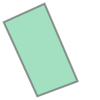

In [26]:
polys['sa']

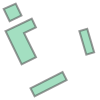

In [37]:
ground_elem = 'gml:Surface//gml:posList'
list_poly_elem = elem['se'].findall(".//{}".format(ground_elem),gml_root['se'].nsmap)
polys['se'] = poly_converter(list_poly_elem,mode='2d')
polys['se']

# poly_converter (2d mode): OK

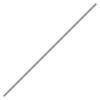

In [17]:
ground_elem = 'bldg:GroundSurface//gml:pos'
list_point_elem = elem['ha'].findall(".//{}".format(ground_elem),gml_root['ha'].nsmap)
poly = point_converter(list_point_elem)
poly 
# point_converter: DOES NOT SEEM OK

In [18]:
wall_elem = 'bldg:WallSurface//gml:posList'
meshes = {f:'' for f in ['ch','sa']}

for f in ['ch','sa']:
    meshes[f] = elem[f].findall(".//{}".format(wall_elem),gml_root[f].nsmap)
    print(surface_to_height(meshes[f],sngl=False,av=False))
    print(surface_to_height(meshes[f],sngl=False,av=True))

# surface_to_height, sngl=False case: OK

11.49
(11.49, 610.5637519990386)
7.19
(7.19, 491.7277142857143)


In [19]:
surf_elem = 'gml:surfaceMember//gml:posList'
meshes = elem['lu'].findall(".//{}".format(surf_elem),gml_root['lu'].nsmap)
surface_to_height(meshes[0],sngl=True,av=True)

# surface_to_height, sngl=True case: OK

(0.0, 345.5)

In [20]:
wall_elem = 'bldg:WallSurface//gml:posList'
for f in ['ch','sa']:
    print(get_heights_wall(wall_elem,bldg_elem_list[f],gml_root[f]))

# get_heights_wall: OK

[11.49, 4.65, 15.52, 7.45, 15.28, 16.56, 0.1, 0.42, 10.8, 4.54, 0.1, 5.94, 11.65, 0.98, 10.07, 8.9, 9.53, 11.84, 14.78, 7.24, 0.1, 20.71, 14.29, 7.57, 13.76, 9.76, 12.62, 5.84, 16.94, 7.28, 10.74, 4.64, 15.87, 9.19, 11.13, 17.77, 9.43, 1.21, 7.75, 15.28, 5.43, 7.81, 17.56, 8.24, 0.1, 18.15, 6.27, 22.38, 11.09, 16.85, 13.2, 9.79, 14.55, 12.02, 5.68, 11.24, 10.02]
[7.19, 9.97, 6.0, 4.68, 9.63, 3.88, 5.82, 3.02, 2.77, 11.96, 3.19, 11.21, 3.76, 5.71, 5.22, 6.52, 5.22]


In [21]:
surf_elem = 'gml:surfaceMember//gml:posList'
list_surf_elem = elem['ha'].findall(".//{}".format(ground_elem),gml_root['ha'].nsmap)
ground_surf_solid_idx(list_surf_elem)

# ground_surf_solid_idx: OK

0

In [22]:
ft_elem = 'bldg:GroundSurface//gml:posList'
for f in ['ch','sa']:
    print(get_footprints(ft_elem,bldg_elem_list[f],gml_root[f],pt=False,solid=None))

# get_footprint, base case: OK

[<shapely.geometry.polygon.Polygon object at 0x0000022E1301ED00>, <shapely.geometry.polygon.Polygon object at 0x0000022E0F643DF0>, <shapely.geometry.polygon.Polygon object at 0x0000022E130715B0>, <shapely.geometry.polygon.Polygon object at 0x0000022E13071940>, <shapely.geometry.polygon.Polygon object at 0x0000022E13071D30>, <shapely.geometry.polygon.Polygon object at 0x0000022E13071C10>, <shapely.geometry.polygon.Polygon object at 0x0000022E13071BB0>, <shapely.geometry.polygon.Polygon object at 0x0000022E13071820>, <shapely.geometry.polygon.Polygon object at 0x0000022E13071EE0>, <shapely.geometry.polygon.Polygon object at 0x0000022E13071B20>, <shapely.geometry.polygon.Polygon object at 0x0000022E130718B0>, <shapely.geometry.polygon.Polygon object at 0x0000022E13071580>, <shapely.geometry.multipolygon.MultiPolygon object at 0x0000022E130717F0>, <shapely.geometry.polygon.Polygon object at 0x0000022E1301EC40>, <shapely.geometry.polygon.Polygon object at 0x0000022E0F643040>, <shapely.geome

In [23]:
ft_elem = 'bldg:GroundSurface//gml:pos'
get_footprints(ft_elem,bldg_elem_list['ha'],gml_root['ha'],pt=True,solid=None)

# get_footprint, point case: OK (s.t. point converter being OK)

In [8]:
ft_elem = 'gml:surfaceMember//gml:posList'
get_footprints(ft_elem,bldg_elem_list['lu'],gml_root['lu'],pt=False,solid=True)

# get_footprint, solid case: OK

In [38]:
ft_elem = 'gml:Surface//gml:posList'
get_footprints(ft_elem,bldg_elem_list['se'],gml_root['se'],mode='2d')

# get_footprint, 2d mode: OK